# Import relevant libraries


In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import and clean climate data

In [2]:
url = 'https://archive-api.open-meteo.com/v1/archive?latitude=38.2971&longitude=-122.2855&start_date=1991-01-01&end_date=2019-12-31&daily=temperature_2m_mean,precipitation_sum&timezone=America%2FLos_Angeles'

In [3]:
response = requests.get(url)

In [4]:
response

<Response [200]>

In [5]:
type(response)

requests.models.Response

In [7]:
response.url

'https://archive-api.open-meteo.com/v1/archive?latitude=38.2971&longitude=-122.2855&start_date=1991-01-01&end_date=2019-12-31&daily=temperature_2m_mean,precipitation_sum&timezone=America%2FLos_Angeles'

In [8]:
response.content

b'{"latitude":38.199997,"longitude":-122.399994,"generationtime_ms":6.8520307540893555,"utc_offset_seconds":-25200,"timezone":"America/Los_Angeles","timezone_abbreviation":"PDT","elevation":11.0,"daily_units":{"time":"iso8601","temperature_2m_mean":"\xc2\xb0C","precipitation_sum":"mm"},"daily":{"time":["1991-01-01","1991-01-02","1991-01-03","1991-01-04","1991-01-05","1991-01-06","1991-01-07","1991-01-08","1991-01-09","1991-01-10","1991-01-11","1991-01-12","1991-01-13","1991-01-14","1991-01-15","1991-01-16","1991-01-17","1991-01-18","1991-01-19","1991-01-20","1991-01-21","1991-01-22","1991-01-23","1991-01-24","1991-01-25","1991-01-26","1991-01-27","1991-01-28","1991-01-29","1991-01-30","1991-01-31","1991-02-01","1991-02-02","1991-02-03","1991-02-04","1991-02-05","1991-02-06","1991-02-07","1991-02-08","1991-02-09","1991-02-10","1991-02-11","1991-02-12","1991-02-13","1991-02-14","1991-02-15","1991-02-16","1991-02-17","1991-02-18","1991-02-19","1991-02-20","1991-02-21","1991-02-22","1991-0

In [9]:
response.json()

{'latitude': 38.199997,
 'longitude': -122.399994,
 'generationtime_ms': 6.8520307540893555,
 'utc_offset_seconds': -25200,
 'timezone': 'America/Los_Angeles',
 'timezone_abbreviation': 'PDT',
 'elevation': 11.0,
 'daily_units': {'time': 'iso8601',
  'temperature_2m_mean': '°C',
  'precipitation_sum': 'mm'},
 'daily': {'time': ['1991-01-01',
   '1991-01-02',
   '1991-01-03',
   '1991-01-04',
   '1991-01-05',
   '1991-01-06',
   '1991-01-07',
   '1991-01-08',
   '1991-01-09',
   '1991-01-10',
   '1991-01-11',
   '1991-01-12',
   '1991-01-13',
   '1991-01-14',
   '1991-01-15',
   '1991-01-16',
   '1991-01-17',
   '1991-01-18',
   '1991-01-19',
   '1991-01-20',
   '1991-01-21',
   '1991-01-22',
   '1991-01-23',
   '1991-01-24',
   '1991-01-25',
   '1991-01-26',
   '1991-01-27',
   '1991-01-28',
   '1991-01-29',
   '1991-01-30',
   '1991-01-31',
   '1991-02-01',
   '1991-02-02',
   '1991-02-03',
   '1991-02-04',
   '1991-02-05',
   '1991-02-06',
   '1991-02-07',
   '1991-02-08',
   '1991-0

In [10]:
napa_weather_df = pd.DataFrame(response.json())

In [11]:
napa_weather_df

,latitude,longitude,generationtime_ms,utc_offset_seconds,timezone,timezone_abbreviation,elevation,daily_units,daily
time,38.199997,-122.399994,6.852031,-25200,America/Los_Angeles,PDT,11.0,iso8601,"[1991-01-01, 1991-01-02, 1991-01-03, 1991-01-0..."
temperature_2m_mean,38.199997,-122.399994,6.852031,-25200,America/Los_Angeles,PDT,11.0,°C,"[2.9, 3.6, 5.6, 6.9, 5.0, 3.8, 8.5, 7.0, 8.3, ..."
precipitation_sum,38.199997,-122.399994,6.852031,-25200,America/Los_Angeles,PDT,11.0,mm,"[0.0, 0.0, 0.0, 0.0, 0.0, 3.2, 5.6, 0.0, 8.1, ..."


In [15]:
napa_weather_df_normalized = pd.json_normalize(response.json())
napa_weather_df_normalized

,latitude,longitude,generationtime_ms,utc_offset_seconds,timezone,timezone_abbreviation,elevation,daily_units.time,daily_units.temperature_2m_mean,daily_units.precipitation_sum,daily.time,daily.temperature_2m_mean,daily.precipitation_sum
0,38.199997,-122.399994,6.852031,-25200,America/Los_Angeles,PDT,11.0,iso8601,°C,mm,"[1991-01-01, 1991-01-02, 1991-01-03, 1991-01-0...","[2.9, 3.6, 5.6, 6.9, 5.0, 3.8, 8.5, 7.0, 8.3, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 3.2, 5.6, 0.0, 8.1, ..."


In [26]:
napaweather = pd.read_csv("cali weather.csv")

In [27]:
napaweather

,time,temperature_2m_mean (°C),precipitation_sum (mm)
0,01/01/1991,2.9,0.0
1,02/01/1991,3.6,0.0
2,03/01/1991,5.6,0.0
3,04/01/1991,6.9,0.0
4,05/01/1991,5.0,0.0
...,...,...,...
10587,27/12/2019,7.3,0.0
10588,28/12/2019,7.4,0.0
10589,29/12/2019,8.9,9.8
10590,30/12/2019,9.2,0.4


In [30]:
def get_season_from_date(date_str):
    # Split the date string into day, month, and year components
    day, month, year = map(int, date_str.split('/'))

    # Determine the season based on the month component
    if (month >= 3 and month <= 5):
        season = 'Spring'
    elif (month >= 6 and month <= 8):
        season = 'Summer'
    elif (month >= 9 and month <= 11):
        season = 'Autumn'
    else:
        season = 'Winter'

    return season


In [31]:
# Create a new column 'new_column' using the 'column1' values
napaweather['season'] = napaweather['time'].apply(get_season_from_date)

In [129]:
napaweather

,time,temperature_2m_mean (°C),precipitation_sum (mm),season,year,season_and_year,month,season_and_year2,year_month
0,01/01/1991,2.9,0.0,Winter,1991,1991 Winter,1,1991 1 Winter,1991 1
1,02/01/1991,3.6,0.0,Winter,1991,1991 Winter,1,1991 1 Winter,1991 1
2,03/01/1991,5.6,0.0,Winter,1991,1991 Winter,1,1991 1 Winter,1991 1
3,04/01/1991,6.9,0.0,Winter,1991,1991 Winter,1,1991 1 Winter,1991 1
4,05/01/1991,5.0,0.0,Winter,1991,1991 Winter,1,1991 1 Winter,1991 1
...,...,...,...,...,...,...,...,...,...
10587,27/12/2019,7.3,0.0,Winter,2019,2019 Winter,12,2019 12 Winter,2019 12
10588,28/12/2019,7.4,0.0,Winter,2019,2019 Winter,12,2019 12 Winter,2019 12
10589,29/12/2019,8.9,9.8,Winter,2019,2019 Winter,12,2019 12 Winter,2019 12
10590,30/12/2019,9.2,0.4,Winter,2019,2019 Winter,12,2019 12 Winter,2019 12


In [36]:
def get_year_from_date(date_str):
    # Split the date string into day, month, and year components
    day, month, year = map(int, date_str.split('/'))
    return year

In [78]:
def get_month_from_date(date_str):
    # Split the date string into day, month, and year components
    day, month, year = map(int, date_str.split('/'))
    return month

In [79]:
# Create a new column 'new_column' using the 'column1' values
napaweather['month'] = napaweather['time'].apply(get_month_from_date)

In [80]:
napaweather

,time,temperature_2m_mean (°C),precipitation_sum (mm),season,year,season_and_year,month
0,01/01/1991,2.9,0.0,Winter,1991,1991 Winter,1
1,02/01/1991,3.6,0.0,Winter,1991,1991 Winter,1
2,03/01/1991,5.6,0.0,Winter,1991,1991 Winter,1
3,04/01/1991,6.9,0.0,Winter,1991,1991 Winter,1
4,05/01/1991,5.0,0.0,Winter,1991,1991 Winter,1
...,...,...,...,...,...,...,...
10587,27/12/2019,7.3,0.0,Winter,2019,2019 Winter,12
10588,28/12/2019,7.4,0.0,Winter,2019,2019 Winter,12
10589,29/12/2019,8.9,9.8,Winter,2019,2019 Winter,12
10590,30/12/2019,9.2,0.4,Winter,2019,2019 Winter,12


In [46]:
napaweather['year'] = napaweather[str('year')]
napaweather

,time,temperature_2m_mean (°C),precipitation_sum (mm),season,year
0,01/01/1991,2.9,0.0,Winter,1991
1,02/01/1991,3.6,0.0,Winter,1991
2,03/01/1991,5.6,0.0,Winter,1991
3,04/01/1991,6.9,0.0,Winter,1991
4,05/01/1991,5.0,0.0,Winter,1991
...,...,...,...,...,...
10587,27/12/2019,7.3,0.0,Winter,2019
10588,28/12/2019,7.4,0.0,Winter,2019
10589,29/12/2019,8.9,9.8,Winter,2019
10590,30/12/2019,9.2,0.4,Winter,2019


In [89]:
napaweather

,time,temperature_2m_mean (°C),precipitation_sum (mm),season,year,season_and_year,month
0,01/01/1991,2.9,0.0,Winter,1991,1991 Winter,1
1,02/01/1991,3.6,0.0,Winter,1991,1991 Winter,1
2,03/01/1991,5.6,0.0,Winter,1991,1991 Winter,1
3,04/01/1991,6.9,0.0,Winter,1991,1991 Winter,1
4,05/01/1991,5.0,0.0,Winter,1991,1991 Winter,1
...,...,...,...,...,...,...,...
10587,27/12/2019,7.3,0.0,Winter,2019,2019 Winter,12
10588,28/12/2019,7.4,0.0,Winter,2019,2019 Winter,12
10589,29/12/2019,8.9,9.8,Winter,2019,2019 Winter,12
10590,30/12/2019,9.2,0.4,Winter,2019,2019 Winter,12


In [92]:
napaweather['season_and_year2'] = napaweather['year'].astype(str) + ' ' + napaweather['month'].astype(str) + ' ' + napaweather['season']

In [93]:
napaweather

,time,temperature_2m_mean (°C),precipitation_sum (mm),season,year,season_and_year,month,season_and_year2
0,01/01/1991,2.9,0.0,Winter,1991,1991 Winter,1,1991 1 Winter
1,02/01/1991,3.6,0.0,Winter,1991,1991 Winter,1,1991 1 Winter
2,03/01/1991,5.6,0.0,Winter,1991,1991 Winter,1,1991 1 Winter
3,04/01/1991,6.9,0.0,Winter,1991,1991 Winter,1,1991 1 Winter
4,05/01/1991,5.0,0.0,Winter,1991,1991 Winter,1,1991 1 Winter
...,...,...,...,...,...,...,...,...
10587,27/12/2019,7.3,0.0,Winter,2019,2019 Winter,12,2019 12 Winter
10588,28/12/2019,7.4,0.0,Winter,2019,2019 Winter,12,2019 12 Winter
10589,29/12/2019,8.9,9.8,Winter,2019,2019 Winter,12,2019 12 Winter
10590,30/12/2019,9.2,0.4,Winter,2019,2019 Winter,12,2019 12 Winter


In [106]:
napaweatherngs = napaweather[napaweather['month'] < 4]

In [107]:
napaweatherngs

,time,temperature_2m_mean (°C),precipitation_sum (mm),season,year,season_and_year,month,season_and_year2,year_month
0,01/01/1991,2.9,0.0,Winter,1991,1991 Winter,1,1991 1 Winter,1991 1
1,02/01/1991,3.6,0.0,Winter,1991,1991 Winter,1,1991 1 Winter,1991 1
2,03/01/1991,5.6,0.0,Winter,1991,1991 Winter,1,1991 1 Winter,1991 1
3,04/01/1991,6.9,0.0,Winter,1991,1991 Winter,1,1991 1 Winter,1991 1
4,05/01/1991,5.0,0.0,Winter,1991,1991 Winter,1,1991 1 Winter,1991 1
...,...,...,...,...,...,...,...,...,...
10312,27/03/2019,12.5,6.0,Spring,2019,2019 Spring,3,2019 3 Spring,2019 3
10313,28/03/2019,11.0,7.0,Spring,2019,2019 Spring,3,2019 3 Spring,2019 3
10314,29/03/2019,10.6,0.0,Spring,2019,2019 Spring,3,2019 3 Spring,2019 3
10315,30/03/2019,12.7,0.0,Spring,2019,2019 Spring,3,2019 3 Spring,2019 3


In [98]:
napaweather['year_month'] = napaweather['year'].astype(str) + ' ' + napaweather['month'].astype(str)

In [99]:
napaweather

,time,temperature_2m_mean (°C),precipitation_sum (mm),season,year,season_and_year,month,season_and_year2,year_month
0,01/01/1991,2.9,0.0,Winter,1991,1991 Winter,1,1991 1 Winter,1991 1
1,02/01/1991,3.6,0.0,Winter,1991,1991 Winter,1,1991 1 Winter,1991 1
2,03/01/1991,5.6,0.0,Winter,1991,1991 Winter,1,1991 1 Winter,1991 1
3,04/01/1991,6.9,0.0,Winter,1991,1991 Winter,1,1991 1 Winter,1991 1
4,05/01/1991,5.0,0.0,Winter,1991,1991 Winter,1,1991 1 Winter,1991 1
...,...,...,...,...,...,...,...,...,...
10587,27/12/2019,7.3,0.0,Winter,2019,2019 Winter,12,2019 12 Winter,2019 12
10588,28/12/2019,7.4,0.0,Winter,2019,2019 Winter,12,2019 12 Winter,2019 12
10589,29/12/2019,8.9,9.8,Winter,2019,2019 Winter,12,2019 12 Winter,2019 12
10590,30/12/2019,9.2,0.4,Winter,2019,2019 Winter,12,2019 12 Winter,2019 12


In [ ]:
year_month

In [101]:
napaweathergs = napaweather[napaweather['month'] > 4]

In [102]:
napaweathergs

,time,temperature_2m_mean (°C),precipitation_sum (mm),season,year,season_and_year,month,season_and_year2,year_month
120,01/05/1991,10.8,0.2,Spring,1991,1991 Spring,5,1991 5 Spring,1991 5
121,02/05/1991,10.9,0.0,Spring,1991,1991 Spring,5,1991 5 Spring,1991 5
122,03/05/1991,12.4,0.0,Spring,1991,1991 Spring,5,1991 5 Spring,1991 5
123,04/05/1991,13.8,0.0,Spring,1991,1991 Spring,5,1991 5 Spring,1991 5
124,05/05/1991,15.8,0.2,Spring,1991,1991 Spring,5,1991 5 Spring,1991 5
...,...,...,...,...,...,...,...,...,...
10587,27/12/2019,7.3,0.0,Winter,2019,2019 Winter,12,2019 12 Winter,2019 12
10588,28/12/2019,7.4,0.0,Winter,2019,2019 Winter,12,2019 12 Winter,2019 12
10589,29/12/2019,8.9,9.8,Winter,2019,2019 Winter,12,2019 12 Winter,2019 12
10590,30/12/2019,9.2,0.4,Winter,2019,2019 Winter,12,2019 12 Winter,2019 12


In [113]:
season_rain = napaweatherngs.groupby('year').agg({'precipitation_sum (mm)':'sum'}).reset_index()
season_rain

,year,precipitation_sum (mm)
0,1991,318.9
1,1992,341.9
2,1993,477.3
3,1994,230.6
4,1995,615.2
5,1996,401.0
6,1997,254.7
7,1998,633.4
8,1999,320.4
9,2000,428.5


In [130]:
season_rain.to_csv('season_rain.csv')

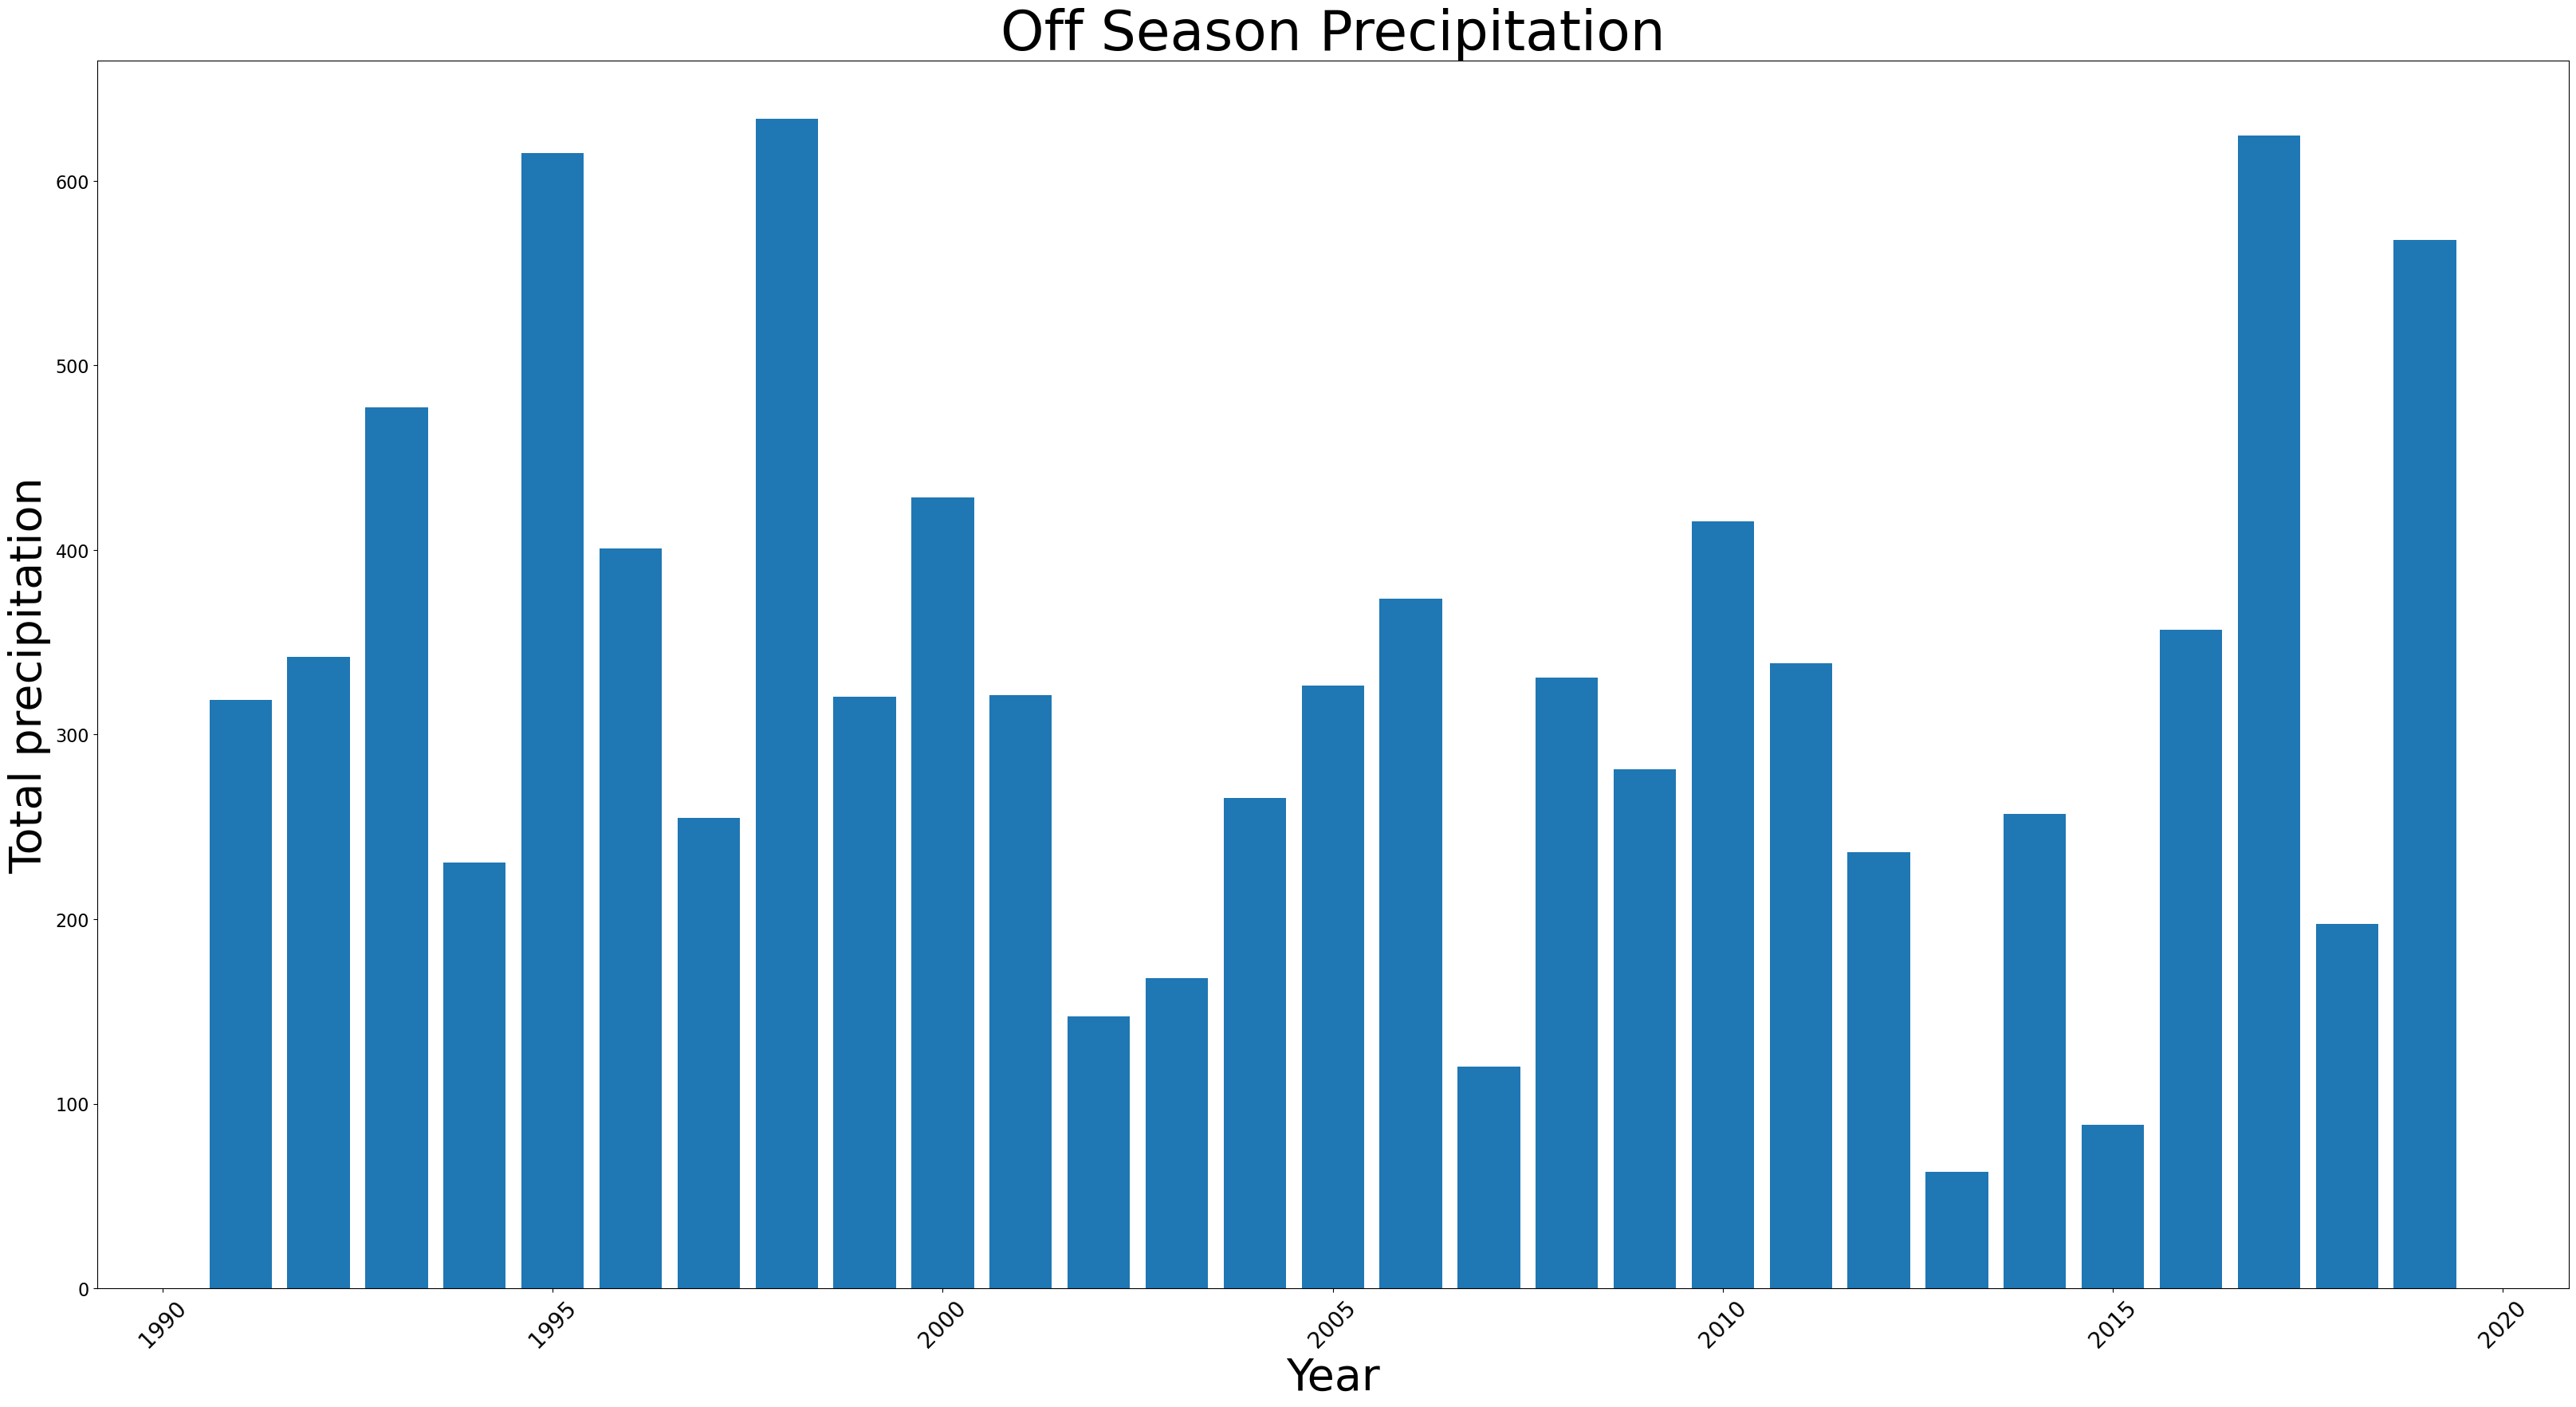

In [127]:
plt.figure(figsize=(40,20))
plt.bar(season_rain["year"],season_rain["precipitation_sum (mm)"])

plt.xticks(fontsize = 20, rotation = 45)
plt.yticks(fontsize = 16)
plt.xlabel('Year', fontsize=40)
plt.ylabel('Total precipitation', fontsize=40)
plt.title('non-grape Precipitation', fontsize=50)
plt.show()

In [117]:
season_temp = napaweatherngs.groupby('year').agg({'temperature_2m_mean (°C)':'mean'}).reset_index()
season_temp

,year,temperature_2m_mean (°C)
0,1991,10.001111
1,1992,10.697802
2,1993,9.978889
3,1994,10.215556
4,1995,10.785556
5,1996,11.106593
6,1997,11.266667
7,1998,10.245556
8,1999,8.706667
9,2000,10.462637


In [131]:
season_temp.to_csv('season_temp.csv')

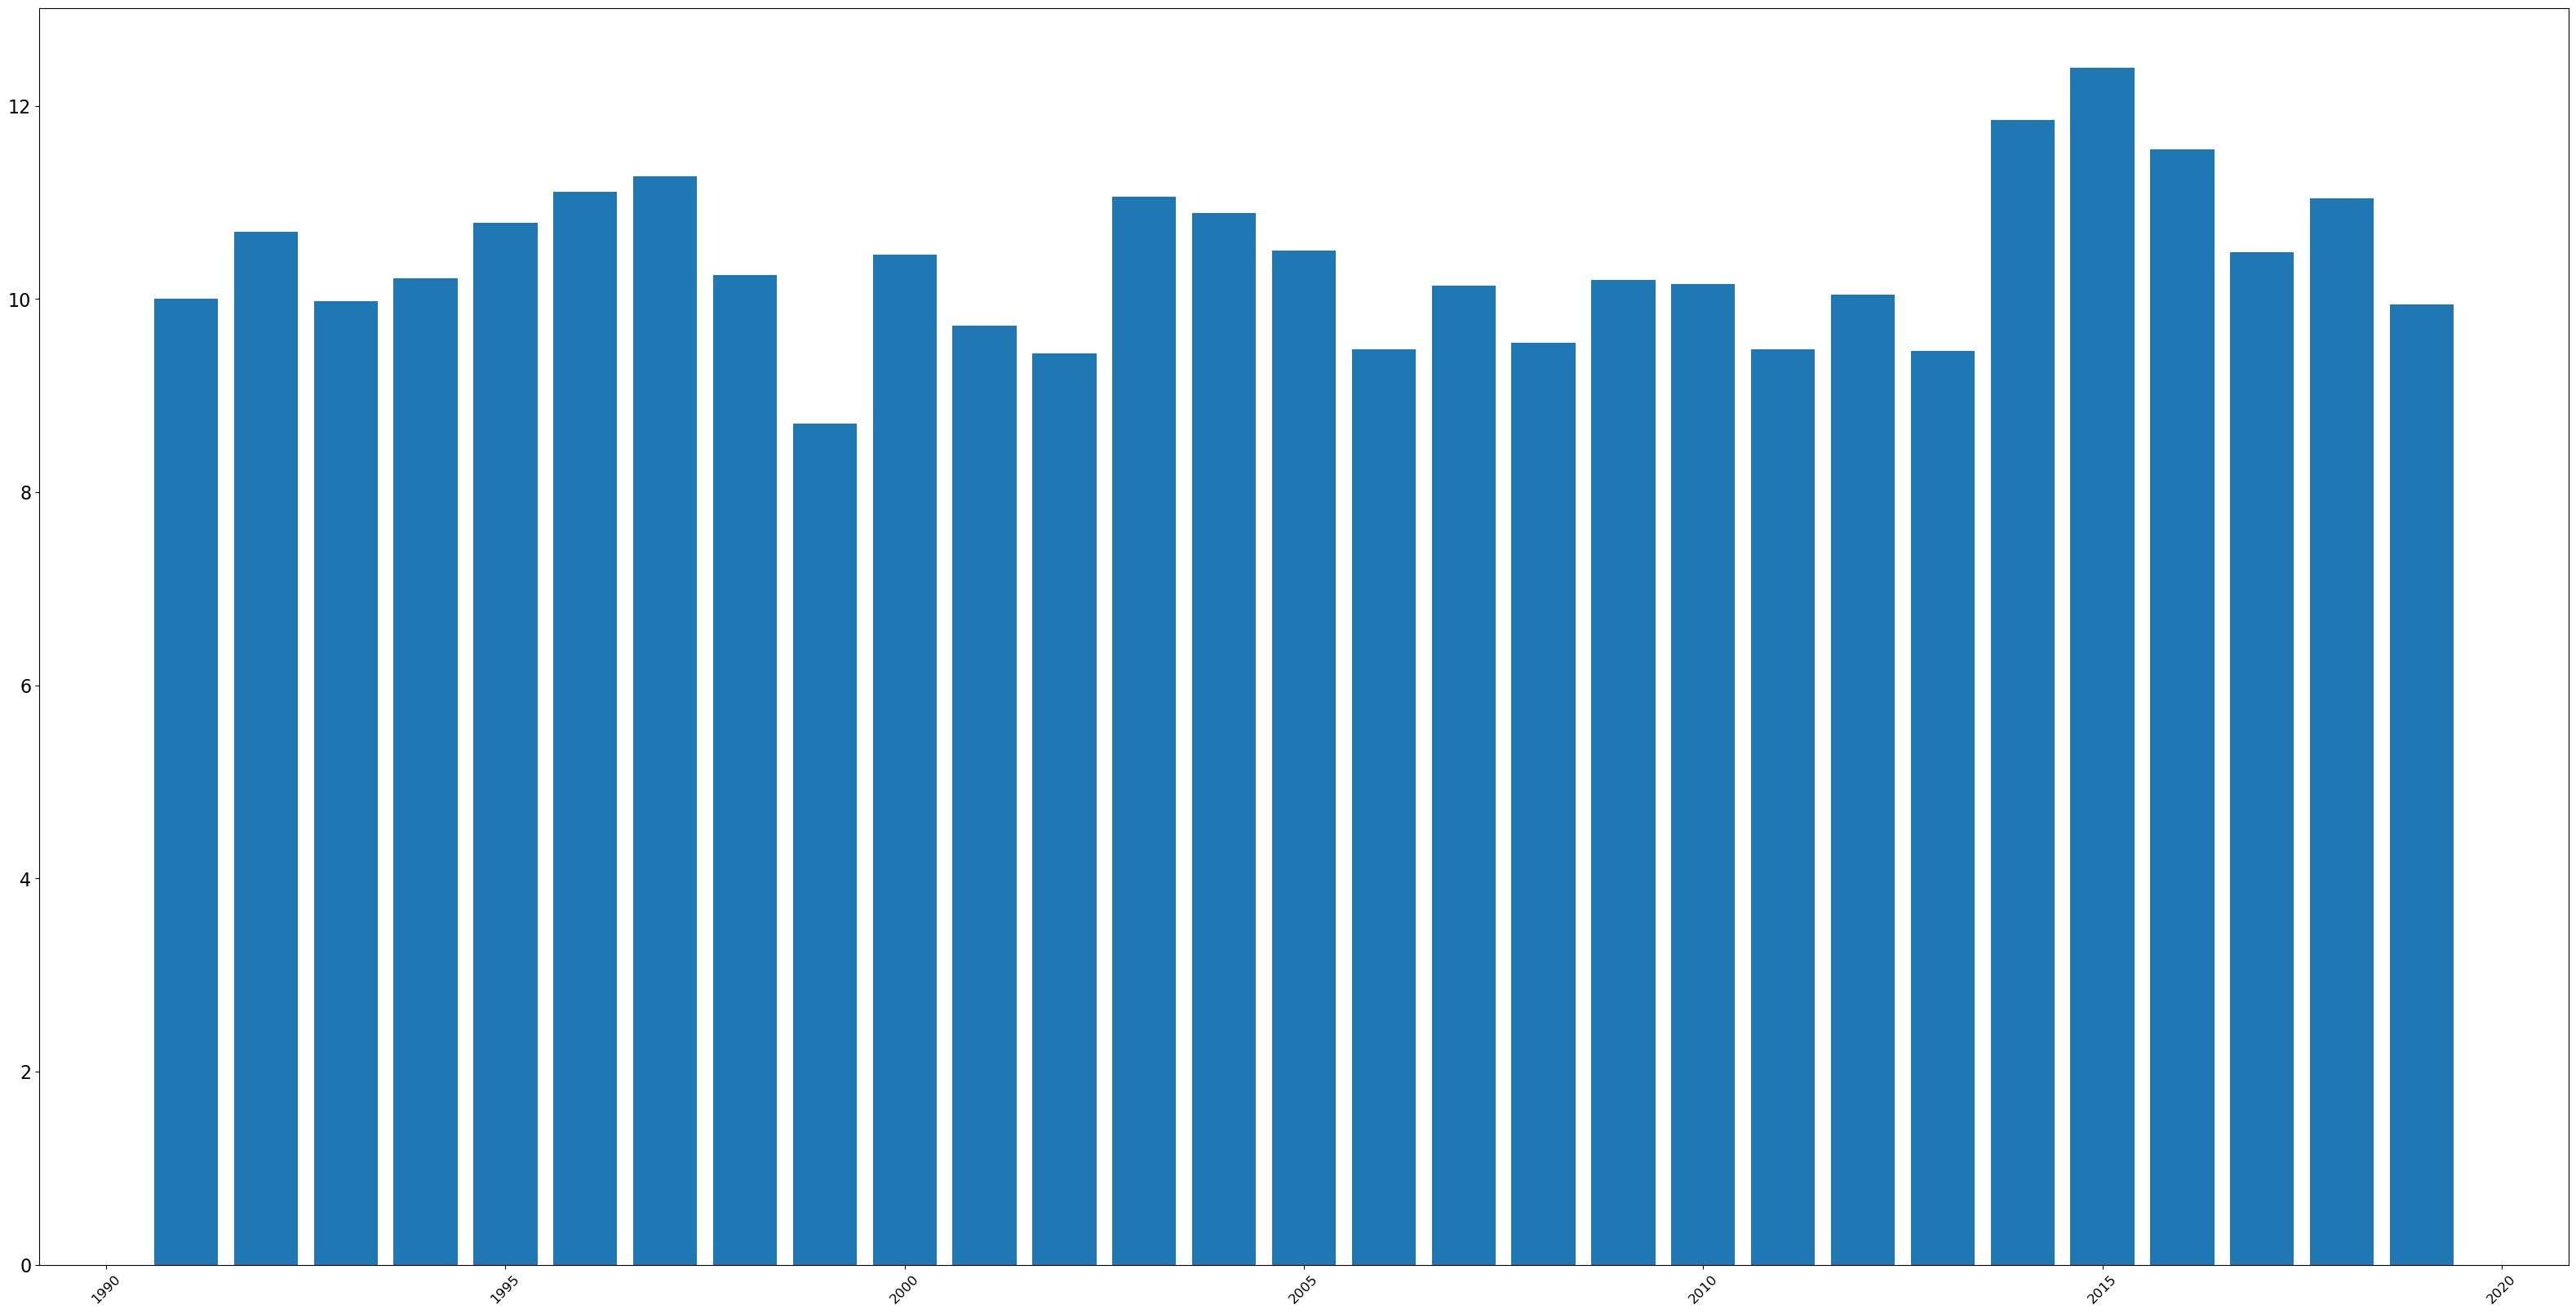

In [119]:
plt.figure(figsize=(40,20))
plt.bar(season_temp["year"],season_temp["temperature_2m_mean (°C)"])
plt.xticks(fontsize = 12, rotation = 45)
plt.yticks(fontsize = 16)
plt.show()

In [61]:
season_temp = napaweatherngs.groupby('season_and_year').agg({'temperature_2m_mean (°C)':'mean'}).reset_index()
season_temp

,season_and_year,temperature_2m_mean (°C)
0,1991 Autumn,16.732967
1,1991 Spring,12.450000
2,1991 Summer,18.530435
3,1991 Winter,9.758889
4,1992 Autumn,16.881319
...,...,...
111,2018 Winter,10.347778
112,2019 Autumn,17.387912
113,2019 Spring,13.567391
114,2019 Summer,21.040217


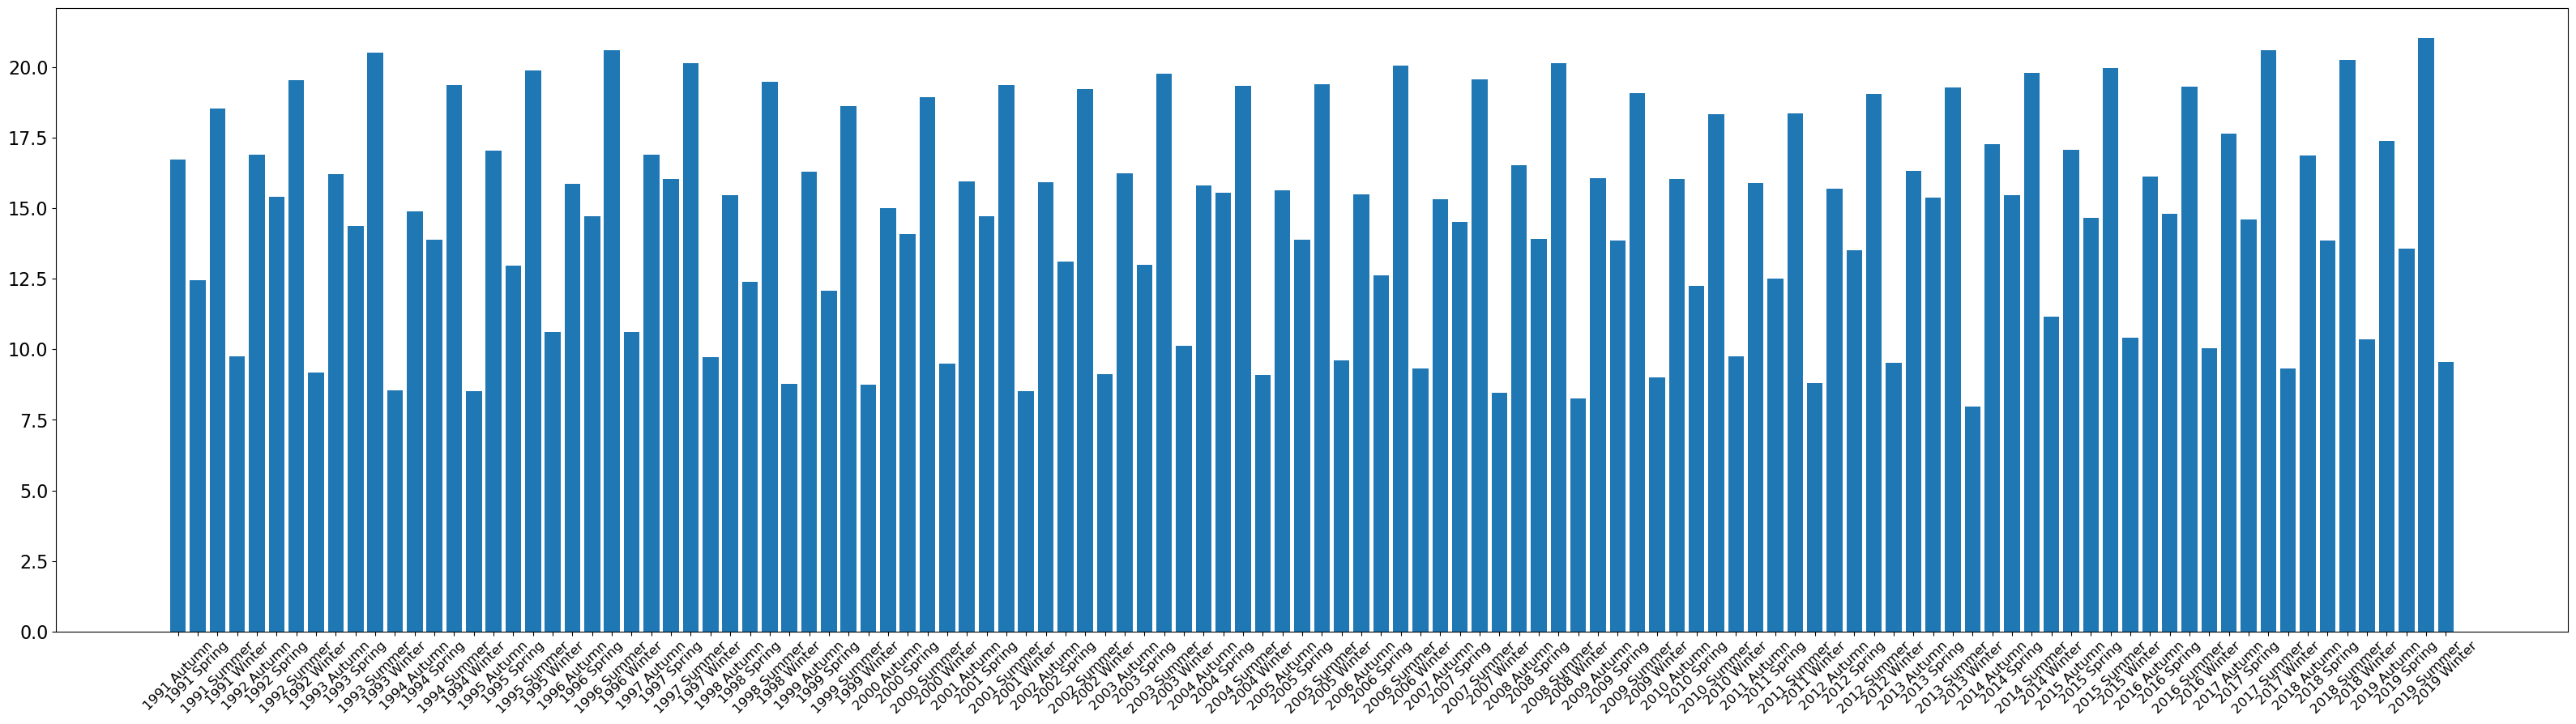

In [65]:
plt.figure(figsize=(40,10))
plt.bar(season_temp["season_and_year"],season_temp["temperature_2m_mean (°C)"])
plt.xticks(fontsize = 12, rotation = 45)
plt.yticks(fontsize = 16)
plt.show()